# Numpy矩阵库

In [17]:
import numpy.matlib
import numpy as np
import pandas as pd

## eye()

In [50]:
# 4*5，对角线为1的矩阵
fiveByfiveMatrix = np.matlib.eye(4,5,0, dtype=np.int32)
print(fiveByfiveMatrix)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]]


## ones()

In [49]:
onesMatrix = np.matlib.ones((2,2), dtype=np.int32)
print(onesMatrix)

[[1 1]
 [1 1]]


## zeros()

In [53]:
zerosMatrix = np.matlib.zeros((3,2), dtype=np.int16)
print(zerosMatrix)

[[0 0]
 [0 0]
 [0 0]]


## identity()

In [42]:
# 5*5，单位矩阵
IdentityMatrix = np.matlib.identity(5,dtype=np.float32)
IdentityMatrix

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], dtype=float32)

# 绘制散点图

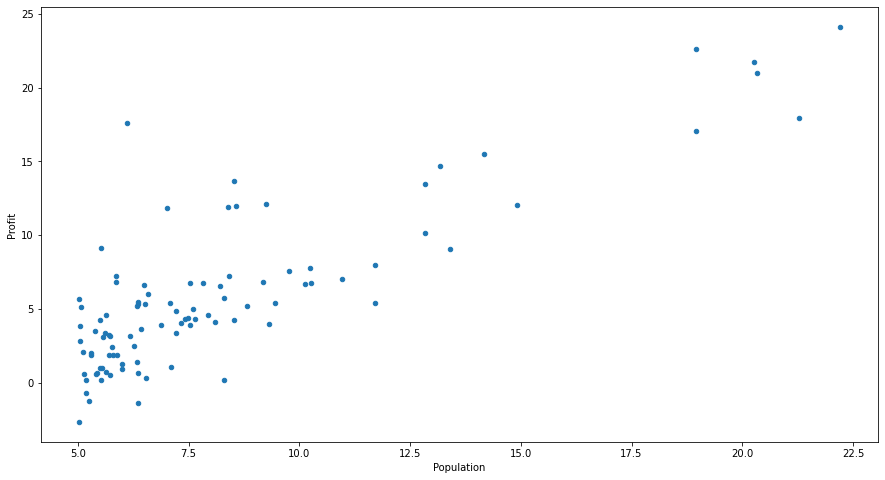

In [113]:
# 读取文件，默认以第一行数据作为表头，故需要指定 names
demo = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])

# 数据集前几条
# data.head()

# 数据详情
#data.describe()

# api文档：https://www.gairuo.com/p/pandas-tutorial
# x y 的值要和 names 一样
df = demo.plot.scatter(x='Population', y='Profit', figsize=(15,8))

# Gradient Descent

## Cost Function

以参数 θ 为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

## Hypothesis Function
\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

# 单变量线性回归

In [159]:
import numpy as np
import pandas as pd

"""
实现代价函数

:param X     训练集中 x0 和 x1-Population 的所有值
:param y     训练集中 'y-Profit 的所有值
:param theta 特征变量，初始值为 [0 ,0]
"""
def computerCost(X, y, theta):
    
    inner = X @ theta - y        # X @ theta 表叉乘
    square_sum = inner.T @ inner # 求平方和

    return square_sum / (2 * len(X))  # len(X) 等于样本数 m

In [160]:
data = pd.read_csv('ex1data1.txt', names=['x1-Population', 'y-Profit'])

# 训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。
data.insert(0,'x0',1)  # data.insert(位置,列名,值) ，x0 设为 1
print(data.head())


cols = data.shape[1]                 # data.shape = (97, 3)
X = data.iloc[:, 0:cols-1]           # data.iloc[行:行,列:列]。此处为：取出所有行，并去掉最后一列
y = data.iloc[:, -1]                 # 取出最后一列
theta = np.zeros(X.shape[1])         # 特征变量 theta 的个数为 X.shape[1]
print(X.shape, theta.shape, y.shape) # 看下维度


# 计算代价函数
computerCost(X, y, theta)

   x0  x1-Population  y-Profit
0   1         6.1101   17.5920
1   1         5.5277    9.1302
2   1         8.5186   13.6620
3   1         7.0032   11.8540
4   1         5.8598    6.8233
(97, 2) (2,) (97,)


32.07273387745567

# Batch Gradient Decent

批量梯度下降的更新方程:

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$ 
注：此处的 θ 为行向量，j = 0,1,...,n 


$${{\theta }_{j}}:= {{\theta }_{j}} - \alpha  \frac{1}{m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)} {x}^{(i)}_{j}}}$$

In [105]:
"""
计算偏导值

:param X     (m,n)，m-样本数，n-特征变量数
:param y     (m,1)
:param theta (n,1)
"""
def gradient(X, y, theta):
    m = X.shape[0] 
    
    # X @ theta   => (m,n) @ (n,1) => (m,1)
    # X.T @ (m,1) => (n,m) @ (m,1) => (n,1)
    inner = X.T @ (X @ theta - y)
    
    return inner / m

In [106]:
"""
批量梯度下降

:param X     (m,n)，m-样本数，n-特征变量数
:param y     (m,1)
:param theta (n,1)
:param alpha 学习率
:param iters 迭代次数
"""
def batchGradientDescent(X, y, theta, iters, alpha=0.01):
    
    cost_data = [] # 存储代价函数收敛值
    
    for _ in range(iters):
        theta = theta - alpha * gradient(X, y, theta) # 更新方程
        cost_data.append(computerCost(X, y, theta))   
        
    return theta, cost_data

In [107]:
iters = 500
final_theta, cost_data = batchGradientDescent(X, y, theta, iters)

#cost_data
final_theta.values

array([-2.28286727,  1.03099898])

In [108]:
computerCost(X, y, final_theta)

4.7138095311168655

# 数据可视化

## 训练集与预测函数

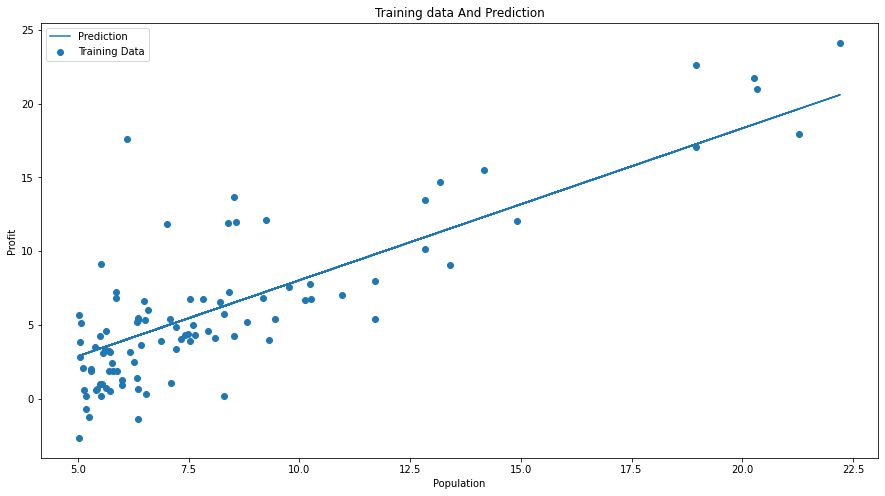

In [137]:
import matplotlib.pyplot as plt

training = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])

intercept = final_theta[0] # 截距
slope = final_theta[1]     # 斜率

plt.figure(figsize=(15,8))                                                               # 图像大小
plt.title("Training Data And Prediction")                                                # 图像标题
plt.xlabel("Population")                                                                 # X 轴
plt.ylabel("Profit")                                                                     # Y 轴
plt.scatter(training.Population, training.Profit, label="Training Data")                 # 散点图
plt.plot(training.Population, training.Population*slope+intercept, label="Prediction")   # 折现图
plt.legend(loc=2)                                                                        # 图例位置，2-左上
plt.show()

## 代价与迭代次数

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

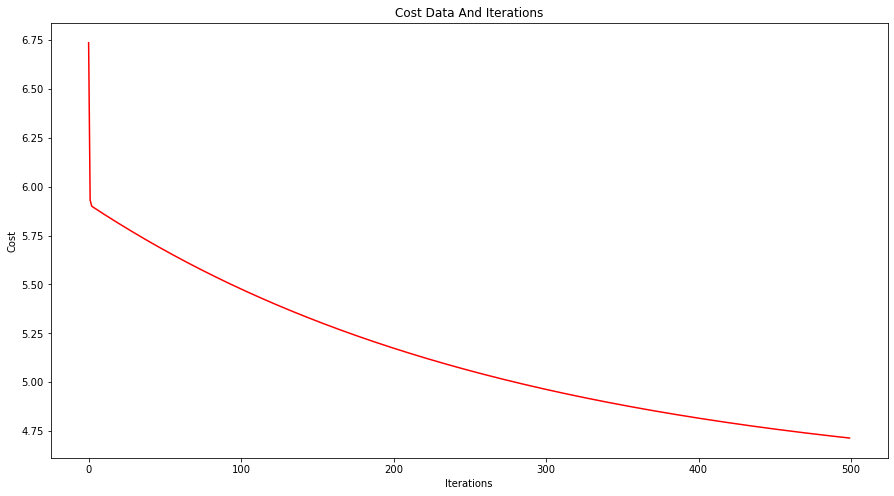

In [140]:
plt.figure(figsize=(15,8))  
plt.title("Cost Data And Iterations") 
plt.xlabel("Iterations") 
plt.ylabel("Cost") 
plt.plot(np.arange(iters), cost_data, 'r')

# 多变量线性回归

## 特征归一化

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [203]:
data2 = pd.read_csv("ex1data2.txt", names=['x1-square', 'x2-bedrooms', 'y-profit'])
print("【data2数据】\n", data2.head(), "\n\n")
print("【data2数据描述】\n", data2.describe(), "\n\n")

# mean() 平均值，std() 标准差
data2 = (data2 - data2.mean()) / data2.std()
data2.insert(0,'x0',1)
print("【data2特征归一化】\n", data2.head(), "\n\n")

【data2数据】
    x1-square  x2-bedrooms  y-profit
0       2104            3    399900
1       1600            3    329900
2       2400            3    369000
3       1416            2    232000
4       3000            4    539900 


【data2数据描述】
          x1-square  x2-bedrooms       y-profit
count    47.000000    47.000000      47.000000
mean   2000.680851     3.170213  340412.659574
std     794.702354     0.760982  125039.899586
min     852.000000     1.000000  169900.000000
25%    1432.000000     3.000000  249900.000000
50%    1888.000000     3.000000  299900.000000
75%    2269.000000     4.000000  384450.000000
max    4478.000000     5.000000  699900.000000 


【data2特征归一化】
    x0  x1-square  x2-bedrooms  y-profit
0   1   0.130010    -0.223675  0.475747
1   1  -0.504190    -0.223675 -0.084074
2   1   0.502476    -0.223675  0.228626
3   1  -0.735723    -1.537767 -0.867025
4   1   1.257476     1.090417  1.595389 




In [205]:
# 数据集切片
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, -1]
theta = np.zeros(X2.shape[1])

# 批量递归下降
iters = 500
final_theta, cost_data = batchGradientDescent(X2, y2, theta, iters)
print(final_theta.values)

computerCost(X2, y2, final_theta)

[-1.18876540e-16  8.30383883e-01  8.23982853e-04]


0.13195133775794732

## 训练集与预测函数

In [ ]:
import matplotlib.pyplot as plt

intercept = final_theta[0] # 截距
slope = final_theta[1]     # 斜率

plt.figure(figsize=(15,8))                                                               # 图像大小
plt.title("Training Data And Prediction")                                                # 图像标题
plt.xlabel("Population")                                                                 # X 轴
plt.ylabel("Profit")                                                                     # Y 轴
plt.scatter(data2.Population, training.Profit, label="Training Data")                 # 散点图
plt.plot(training.Population, training.Population*slope+intercept, label="Prediction")   # 折现图
plt.legend(loc=2)                                                                        # 图例位置，2-左上
plt.show()

## 代价与迭代次数

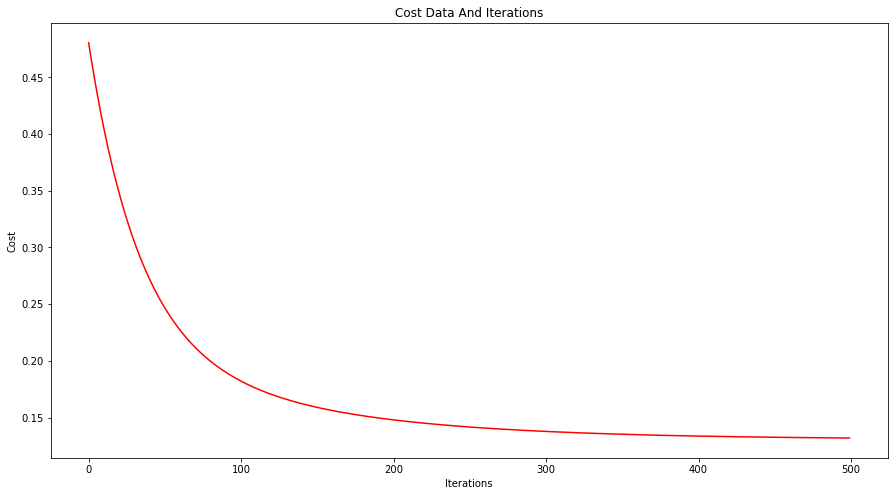

In [206]:
plt.figure(figsize=(15,8))  
plt.title("Cost Data And Iterations") 
plt.xlabel("Iterations") 
plt.ylabel("Cost") 
plt.plot(np.arange(iters), cost_data, 'r')
